In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = '/home/icb/ege.erdogan/mubind/OUTPUTS'
OUTPUT_NAME = 'output221116122458'

In [59]:
# (for earlier results) to update path because output dirs are moved to /OUTPUTS after completion
def add_output_dir_to_path(path, lim=5):
    parts = path.split('/')
    return '/OUTPUTS/'.join(['/'.join(parts[:lim]), '/'.join(parts[lim:])])

# TODO: metrics file extension is tsv but separated by commas in the main code
# metrics, queries: read directly from tsv files
# results: dict, maps lib to df read from archived file
def get_tf_results(output_name, tf_name):
    tf_path = f'{ROOT_DIR}/{output_name}/snakemake/SELEX/{tf_name}/'
    metrics = pd.read_csv(f'{tf_path}/metrics.tsv')
    queries = pd.read_csv(f'{tf_path}/queries.tsv', sep='\t')
    results = dict()
    for lib, path in zip(queries.get('library'), queries.get("counts_path")):
        results[lib] = pd.read_csv(path, sep='\t')
    return metrics, queries, results

# load all results from one output to a hierarchy of dicts, can use a more organized structure
def get_all_results(output_name):
    results = dict()
    results_df = pd.read_csv(f'{ROOT_DIR}/{output_name}/snakemake/results.tsv.gz', sep='\t')
    results['all'] = results_df
    tfs = set(results_df.get('tf_name'))
    for tf_name in tfs:
        tf_metrics, tf_queries, tf_results = get_tf_results(output_name, tf_name)
        results[tf_name] = {'metrics': tf_metrics, 'queries': tf_queries}
        for k, v in tf_results.items():
            results[tf_name][k] = v
    return results

# returns df of r2 histories per epoch (each row: one epoch)
def get_r2_histories(results_df, tf_name):
    df = results_df[tf_name]['metrics']
    return df[(df == -1.0).any(axis=1)].get(['r0', 'library', 'n_epochs', 'r_2'])    

# filters out the r2 histories to get only the final values 
def get_final_r2_values(results_df):
    return results_df[(results_df['best_loss'] != -1.0)].get(['r0', 'library', 'n_epochs', 'r_2'])  

In [35]:
results = get_all_results(OUTPUT_NAME)

In [37]:
results.keys()

dict_keys(['all', 'ELF2', 'ELF3', 'ELK3', 'FOXA1', 'ETV5', 'ALX4', 'CTCF', 'ETV4', 'ELF4', 'EGR1', 'TBX5', 'ALX1', 'ETS1', 'ELK1', 'GATA4', 'ETV6'])

<AxesSubplot: xlabel='n_epochs', ylabel='r_2'>

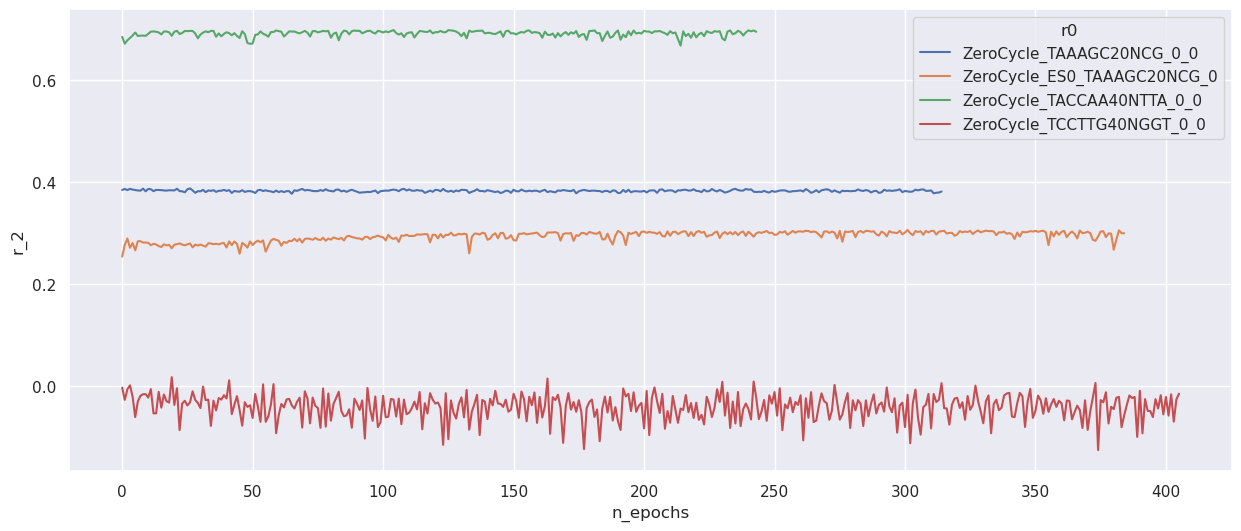

In [85]:
tf_name = 'ALX1'
sns.set_theme(style='darkgrid')
r2_histories = get_r2_histories(results, tf_name)
sns.lineplot(data=r2_histories, y='r_2', x='n_epochs', hue='r0') 

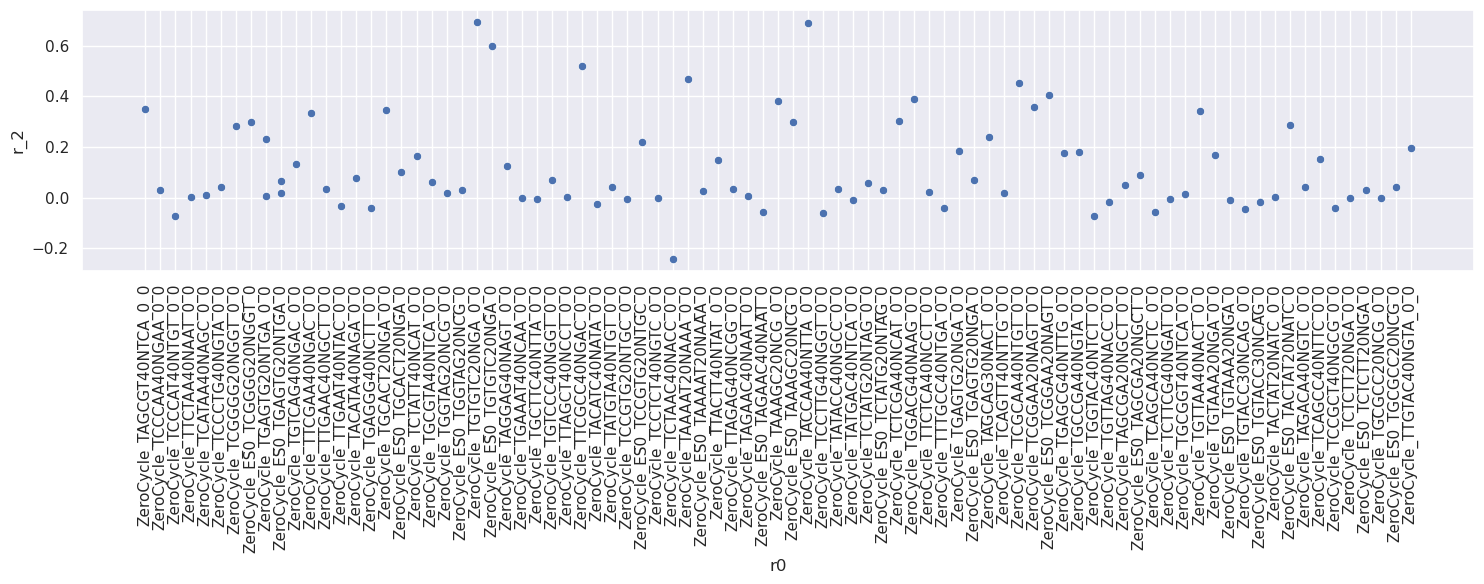

In [76]:
# all final r2 values  

sns.set(rc={'figure.figsize':(15, 6)})

sns.scatterplot(
    data=get_final_r2_values(results['all']),
    x='r0', y='r_2',
)

plt.xticks(rotation=90)
plt.tight_layout()